In [9]:
import pandas as pd

In [6]:
url="https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
data=pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [12]:
# 2. High Level Data Understanding:
#  a. Find no. of rows & columns in the dataset
#  b. Data types of columns.
#  c. Info & describe of data in dataframe

#  a. Find no. of rows & columns in the dataset

data.shape
print("rows:",data.shape[0])
print("columns:",data.shape[1])

rows: 57394
columns: 49


In [15]:
# b. Data types of columns
data_types = data.dtypes
print(data_types)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [19]:
#  c. Info & describe of data in dataframe
print("\nInfo of the dataframe:")
print(data.info())
print("\nDescribe of the dataframe:")
print(data.describe())


Info of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_mil

In [20]:
# a. Find count of unique values in the location column
unique_location_count = data['location'].nunique()
print(f"a. Count of unique values in the 'location' column: {unique_location_count}")


a. Count of unique values in the 'location' column: 216


In [21]:
# b. Find which continent has the maximum frequency using value counts
max_continent_frequency = data['continent'].value_counts().idxmax()
print(f"b. Continent with maximum frequency: {max_continent_frequency}")


b. Continent with maximum frequency: Europe


In [22]:
# c. Find maximum & mean value in 'total_cases'
max_total_cases = data['total_cases'].max()
mean_total_cases = data['total_cases'].mean()
print(f"c. Maximum total cases: {max_total_cases}")
print(f"   Mean total cases: {mean_total_cases}")

c. Maximum total cases: 55154651.0
   Mean total cases: 167797.3688753302


In [23]:
# d. Find 25%, 50%, & 75% quartile value in 'total_deaths'
quartiles_total_deaths = data['total_deaths'].quantile([0.25, 0.5, 0.75])
print(f"d. Quartile values for 'total_deaths':\n{quartiles_total_deaths}")

d. Quartile values for 'total_deaths':
0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [24]:
# e. Find which continent has the maximum 'human_development_index'
max_hdi_continent = data.loc[data['human_development_index'].idxmax(), 'continent']
print(f"e. Continent with maximum 'human_development_index': {max_hdi_continent}")


e. Continent with maximum 'human_development_index': Europe


In [26]:
# f. Find which continent has the minimum 'gdp_per_capita'
min_gdp_continent = data.loc[data['gdp_per_capita'].idxmin(), 'continent']
print(f"f. Continent with minimum 'gdp_per_capita': {min_gdp_continent}")

f. Continent with minimum 'gdp_per_capita': Africa


In [28]:
# . Filter the dataframe with only this columns
# ['continent','location','date','total_cases','total_deaths','gdp_per_ca
# pita','
# human_development_index'] and update the data frame.

selected_columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
filtered_df = data[selected_columns]
data = filtered_df.copy()
print(data.head())


  continent     location      date  total_cases  total_deaths  gdp_per_capita  \
0      Asia  Afghanistan  31/12/19          NaN           NaN        1803.987   
1      Asia  Afghanistan  01/01/20          NaN           NaN        1803.987   
2      Asia  Afghanistan  02/01/20          NaN           NaN        1803.987   
3      Asia  Afghanistan  03/01/20          NaN           NaN        1803.987   
4      Asia  Afghanistan  04/01/20          NaN           NaN        1803.987   

   human_development_index  
0                    0.498  
1                    0.498  
2                    0.498  
3                    0.498  
4                    0.498  


In [30]:
# . Data Cleaning
#  a. Remove all duplicates observations
#  b. Find missing values in all columns
#  c. Remove all observations where continent column value is 
# missing
#  Tip : using subset parameter in dropna
#  d. Fill all missing values with 0

# a. Remove all duplicate observations
data = data.drop_duplicates()
data



,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [31]:
# b. Find missing values in all columns
missing_values = data.isnull().sum()
print("b. Missing values in each column:")
print(missing_values)



b. Missing values in each column:
continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [33]:
# c. Remove all observations where the 'continent' column value is missing
data = data.dropna(subset=['continent'])
data


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [34]:
# d. Fill all missing values with 0
data = data.fillna(0)

data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [35]:
# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(data.head())


Cleaned DataFrame:
  continent     location      date  total_cases  total_deaths  gdp_per_capita  \
0      Asia  Afghanistan  31/12/19          0.0           0.0        1803.987   
1      Asia  Afghanistan  01/01/20          0.0           0.0        1803.987   
2      Asia  Afghanistan  02/01/20          0.0           0.0        1803.987   
3      Asia  Afghanistan  03/01/20          0.0           0.0        1803.987   
4      Asia  Afghanistan  04/01/20          0.0           0.0        1803.987   

   human_development_index  
0                    0.498  
1                    0.498  
2                    0.498  
3                    0.498  
4                    0.498  


In [40]:
# . Date time format :
#  a. Convert date column in datetime format using 
# pandas.to_datetime
#  b. Create new column month after extracting month data from 
# date
#  column.

# a. Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])
data['date']

0       2019-12-31
1       2020-01-01
2       2020-02-01
3       2020-03-01
4       2020-04-01
           ...    
56743   2020-11-13
56744   2020-11-14
56745   2020-11-15
56746   2020-11-16
56747   2020-11-17
Name: date, Length: 56748, dtype: datetime64[ns]

In [42]:
# b. Create a new column 'month' after extracting month data from the 'date' column
data['month'] = data['date'].dt.month


data['month']

0        12
1         1
2         2
3         3
4         4
         ..
56743    11
56744    11
56745    11
56746    11
56747    11
Name: month, Length: 56748, dtype: int64

In [43]:
# Display the DataFrame with the updated 'date' and 'month' columns
print("DataFrame with updated 'date' and 'month' columns:")
print(data.head())

DataFrame with updated 'date' and 'month' columns:
  continent     location       date  total_cases  total_deaths  \
0      Asia  Afghanistan 2019-12-31          0.0           0.0   
1      Asia  Afghanistan 2020-01-01          0.0           0.0   
2      Asia  Afghanistan 2020-02-01          0.0           0.0   
3      Asia  Afghanistan 2020-03-01          0.0           0.0   
4      Asia  Afghanistan 2020-04-01          0.0           0.0   

   gdp_per_capita  human_development_index  month  
0        1803.987                    0.498     12  
1        1803.987                    0.498      1  
2        1803.987                    0.498      2  
3        1803.987                    0.498      3  
4        1803.987                    0.498      4  


In [45]:
# 7. Data Aggregation:
#  a. Find max value in all columns using groupby function on 
# 'continent'
#  column
#  Tip: use reset_index() after applying groupby
#  b. Store the result in a new dataframe named 'df_groupby'.
#  (Use df_groupby dataframe for all further analysis)


df_groupby = data.groupby('continent').max().reset_index()
print("DataFrame df_groupby:")
print(df_groupby)


DataFrame df_groupby:
       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-12-11     752269.0   
1           Asia                         Yemen 2020-12-11    8874290.0   
2         Europe                       Vatican 2020-12-11    1991233.0   
3  North America  United States Virgin Islands 2020-12-11   11205486.0   
4        Oceania             Wallis and Futuna 2020-12-11      27750.0   
5  South America                     Venezuela 2020-12-11    5876464.0   

   total_deaths  gdp_per_capita  human_development_index  month  
0       20314.0       26382.287                    0.797     12  
1      130519.0      116935.600                    0.933     12  
2       52147.0       94277.965                    0.953     12  
3      247220.0       54225.446                    0.926     12  
4         907.0       44648.710                    0.939     12  
5      166014.0       22767.037                    0.843     12

In [47]:
# 8. Feature Engineering :
#  a. Create a new feature 'total_deaths_to_total_cases' by ratio of
#  'total_deaths' column to 'total_cases'

data['total_deaths_to_total_cases'] = data['total_deaths'] / data['total_cases']

print("DataFrame with the new feature 'total_deaths_to_total_cases':")
print(data.head())


DataFrame with the new feature 'total_deaths_to_total_cases':
  continent     location       date  total_cases  total_deaths  \
0      Asia  Afghanistan 2019-12-31          0.0           0.0   
1      Asia  Afghanistan 2020-01-01          0.0           0.0   
2      Asia  Afghanistan 2020-02-01          0.0           0.0   
3      Asia  Afghanistan 2020-03-01          0.0           0.0   
4      Asia  Afghanistan 2020-04-01          0.0           0.0   

   gdp_per_capita  human_development_index  month  total_deaths_to_total_cases  
0        1803.987                    0.498     12                          NaN  
1        1803.987                    0.498      1                          NaN  
2        1803.987                    0.498      2                          NaN  
3        1803.987                    0.498      3                          NaN  
4        1803.987                    0.498      4                          NaN  


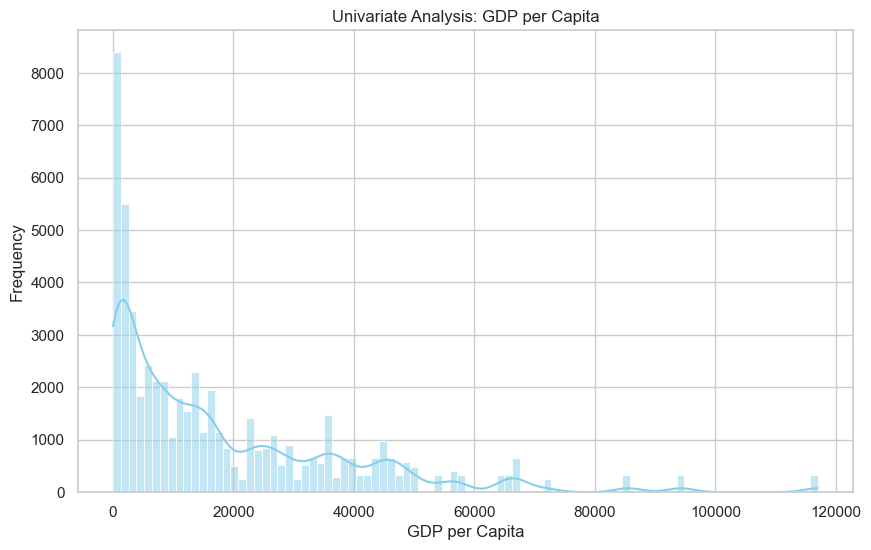

In [49]:
# 9. Data Visualization :
#  a. Perform Univariate analysis on 'gdp_per_capita' column by 
# plotting
#  histogram using seaborn dist plot.
#  b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
#  c. Plot Pairplot on df_groupby dataset.
#  d. Plot a bar plot of 'continent' column with 'total_cases' .
#  Tip : using kind='bar' in seaborn catplot

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# a. Univariate analysis on 'gdp_per_capita' column by plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['gdp_per_capita'], kde=True, color='skyblue')
plt.title('Univariate Analysis: GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()




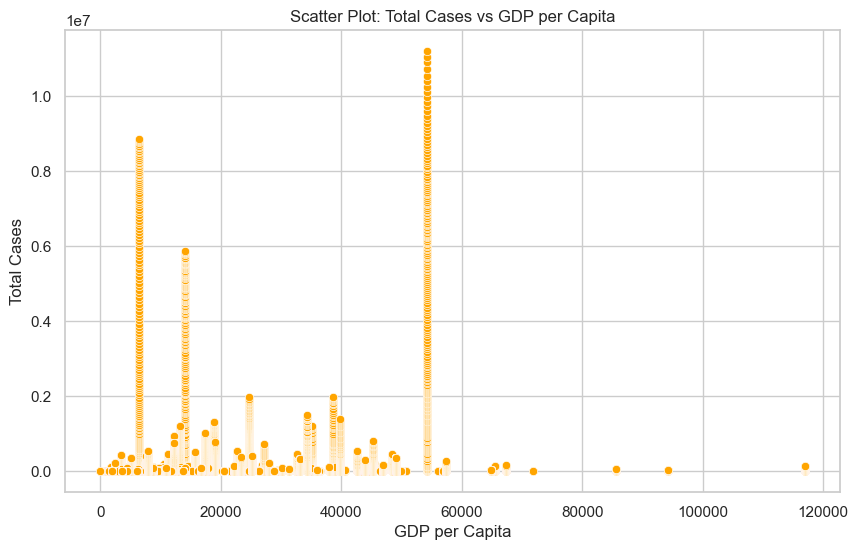

In [50]:
# b. Scatter plot of 'total_cases' & 'gdp_per_capita'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=data, color='orange')
plt.title('Scatter Plot: Total Cases vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.show()



<Figure size 1200x800 with 0 Axes>

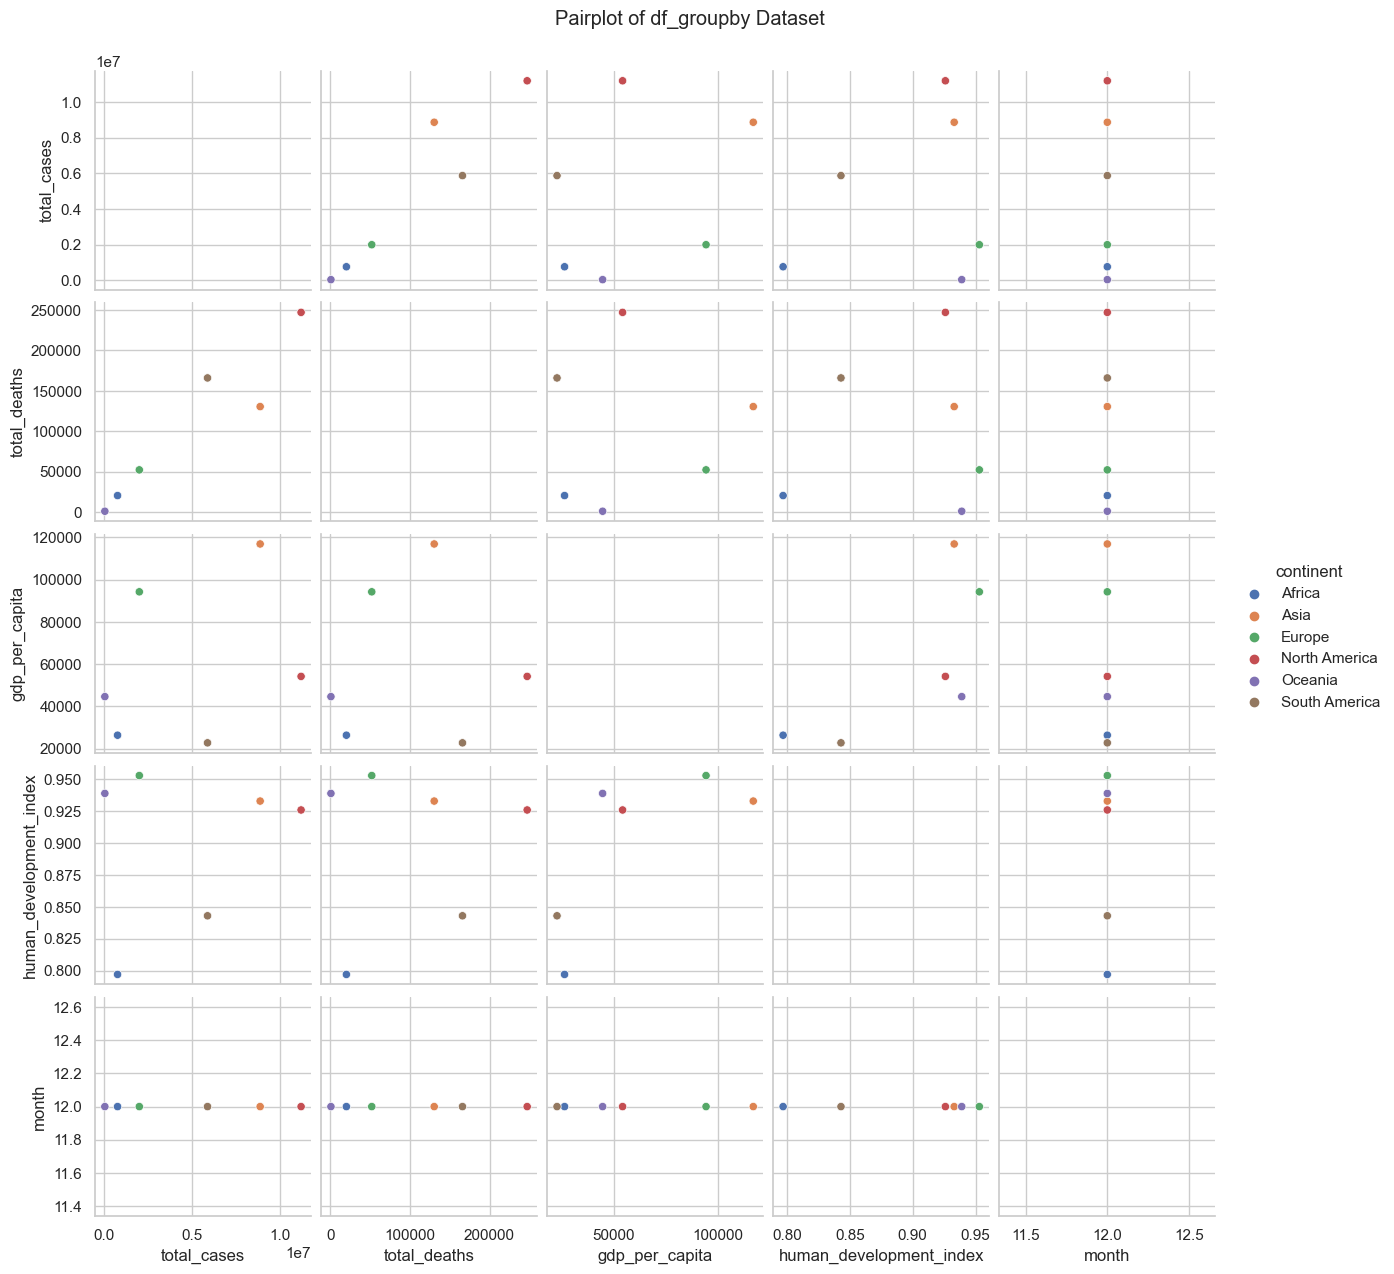

In [51]:
# c. Pairplot on df_groupby dataset
plt.figure(figsize=(12, 8))
sns.pairplot(df_groupby, hue='continent')
plt.suptitle('Pairplot of df_groupby Dataset', y=1.02)
plt.show()



<Figure size 1200x600 with 0 Axes>

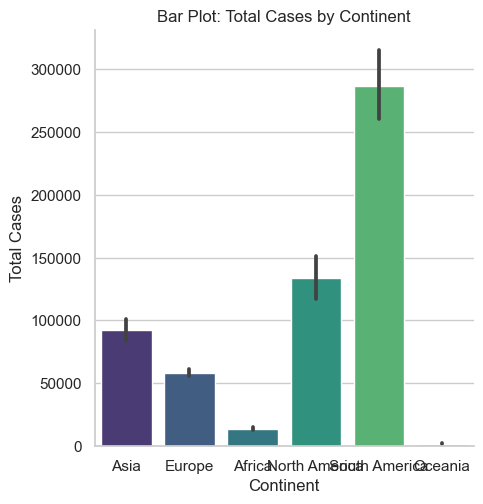

In [52]:
# d. Bar plot of 'continent' column with 'total_cases'
plt.figure(figsize=(12, 6))
sns.catplot(x='continent', y='total_cases', data=data, kind='bar', palette='viridis')
plt.title('Bar Plot: Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

In [54]:
# Save df_groupby to a CSV file
df_groupby.to_csv('df_groupby.csv', index=False)

print("df_groupby DataFrame has been saved to df_groupby.csv")


df_groupby DataFrame has been saved to df_groupby.csv
